In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
train_data.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In [3]:
train_data.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [4]:
test_data.isnull().sum

<bound method DataFrame.sum of         AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
0            False           False         False             False   
1            False           False         False             False   
2            False           False         False             False   
3            False           False         False             False   
4            False           False         False             False   
...            ...             ...           ...               ...   
104475       False           False         False             False   
104476       False           False         False             False   
104477       False           False         False             False   
104478       False           False         False             False   
104479       False           False         False             False   

        PaymentMethod  PaperlessBilling  ContentType  MultiDeviceAccess  \
0               False             False        False 

In [5]:
test_data.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
104475    False
104476    False
104477    False
104478    False
104479    False
Length: 104480, dtype: bool>

In [6]:
customer_id=test_data['CustomerID'].values

In [7]:
customer_ID=train_data['CustomerID'].values

data exploration

In [8]:
train_data= train_data.drop(['SupportTicketsPerMonth','PaymentMethod','PaperlessBilling','MultiDeviceAccess'],axis=1)

train_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Both,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Movies,Tablet,32.450568,25.725595,18,Action,3.478632,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Movies,Computer,7.395160,57.364061,23,Fantasy,4.238824,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,TV Shows,Tablet,27.960389,131.537507,30,Drama,4.276013,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,TV Shows,TV,20.083397,45.356653,20,Comedy,3.616170,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Movies,Computer,13.502729,80.367312,47,Sci-Fi,3.697451,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,TV Shows,TV,24.963291,59.818441,35,Comedy,1.449742,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,TV Shows,TV,10.628728,176.186095,44,Action,4.012217,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,TV Shows,TV,30.466782,153.386315,36,Fantasy,2.135789,Female,5,No,Yes,63SJ44RT4A,0


In [9]:
train_data=train_data.drop(['ParentalControl','SubtitlesEnabled','WatchlistSize','ContentDownloadsPerMonth'],axis=1)
train_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,GenrePreference,UserRating,Gender,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Both,Mobile,36.758104,63.531377,Sci-Fi,2.176498,Male,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Movies,Tablet,32.450568,25.725595,Action,3.478632,Male,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Movies,Computer,7.395160,57.364061,Fantasy,4.238824,Male,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,TV Shows,Tablet,27.960389,131.537507,Drama,4.276013,Male,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,TV Shows,TV,20.083397,45.356653,Comedy,3.616170,Female,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Movies,Computer,13.502729,80.367312,Sci-Fi,3.697451,Male,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,TV Shows,TV,24.963291,59.818441,Comedy,1.449742,Male,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,TV Shows,TV,10.628728,176.186095,Action,4.012217,Male,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,TV Shows,TV,30.466782,153.386315,Fantasy,2.135789,Female,63SJ44RT4A,0


In [10]:
train_data=train_data.drop(['Gender'],axis=1)
train_data.head(8)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ContentType,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,GenrePreference,UserRating,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Both,Mobile,36.758104,63.531377,Sci-Fi,2.176498,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Movies,Tablet,32.450568,25.725595,Action,3.478632,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Movies,Computer,7.395160,57.364061,Fantasy,4.238824,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,TV Shows,Tablet,27.960389,131.537507,Drama,4.276013,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,TV Shows,TV,20.083397,45.356653,Comedy,3.616170,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Both,Mobile,21.678290,97.095746,Comedy,3.721134,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Both,Computer,36.512761,81.782993,Action,4.090868,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,TV Shows,TV,16.355816,154.521682,Fantasy,3.410221,2LDC9AQ3C5,0


In [11]:
train_data=train_data.drop(['CustomerID','DeviceRegistered','AverageViewingDuration'],axis=1)


In [12]:
train_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,ContentType,ViewingHoursPerWeek,GenrePreference,UserRating,Churn
0,20,11.055215,221.104302,Premium,Both,36.758104,Sci-Fi,2.176498,0
1,57,5.175208,294.986882,Basic,Movies,32.450568,Action,3.478632,0
2,73,12.106657,883.785952,Basic,Movies,7.395160,Fantasy,4.238824,0
3,32,7.263743,232.439774,Basic,TV Shows,27.960389,Drama,4.276013,0
4,57,16.953078,966.325422,Premium,TV Shows,20.083397,Comedy,3.616170,0
...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Movies,13.502729,Sci-Fi,3.697451,0
243783,117,13.049257,1526.763053,Premium,TV Shows,24.963291,Comedy,1.449742,0
243784,113,14.514569,1640.146267,Premium,TV Shows,10.628728,Action,4.012217,0
243785,7,18.140555,126.983887,Premium,TV Shows,30.466782,Fantasy,2.135789,0


In [13]:
train_data=train_data.drop(['GenrePreference','ContentType','TotalCharges'],axis=1)
train_data

,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,UserRating,Churn
0,20,11.055215,Premium,36.758104,2.176498,0
1,57,5.175208,Basic,32.450568,3.478632,0
2,73,12.106657,Basic,7.395160,4.238824,0
3,32,7.263743,Basic,27.960389,4.276013,0
4,57,16.953078,Premium,20.083397,3.616170,0
...,...,...,...,...,...,...
243782,77,9.639902,Basic,13.502729,3.697451,0
243783,117,13.049257,Premium,24.963291,1.449742,0
243784,113,14.514569,Premium,10.628728,4.012217,0
243785,7,18.140555,Premium,30.466782,2.135789,0


In [14]:
train_data.head(20)

,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,UserRating,Churn
0,20,11.055215,Premium,36.758104,2.176498,0
1,57,5.175208,Basic,32.450568,3.478632,0
2,73,12.106657,Basic,7.395160,4.238824,0
3,32,7.263743,Basic,27.960389,4.276013,0
4,57,16.953078,Premium,20.083397,3.616170,0
5,113,7.295744,Premium,21.678290,3.721134,0
6,38,12.340675,Premium,36.512761,4.090868,0
7,25,7.247550,Standard,16.355816,3.410221,0
8,26,19.803233,Standard,8.202929,2.679986,1
9,14,18.842934,Standard,38.560694,2.993441,0


# realtionship analysis


In [15]:
train_data['MonthlyCharges'].unique()

array([11.0552151 ,  5.17520846, 12.10665687, ..., 14.51456873,
       18.14055532, 11.59377449])

In [16]:
print(customer_id[100])

720JCMQANC


In [17]:
#sns.pairplot(train_data)

In [18]:
train_data['ViewingHoursPerWeek'].value_counts()

ViewingHoursPerWeek
36.758104    1
17.590530    1
35.683355    1
5.693639     1
19.236108    1
            ..
8.840062     1
34.077083    1
12.050047    1
20.010618    1
24.972537    1
Name: count, Length: 243787, dtype: int64

Text(0, 0.5, 'count')

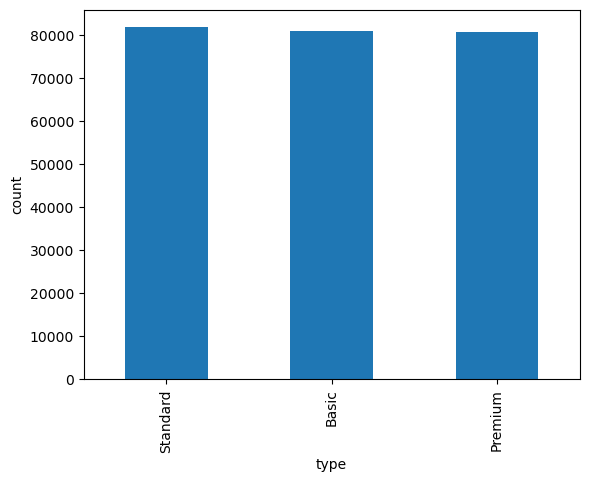

In [19]:
ax=train_data['SubscriptionType'].value_counts().head(5).plot(kind="bar")
ax.set_xlabel("type")
ax.set_ylabel("count")

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

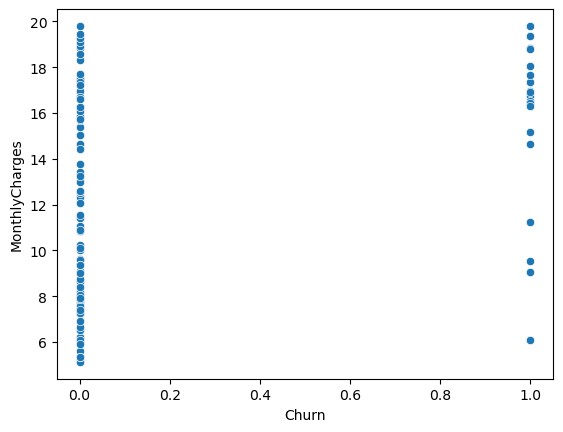

In [20]:
sns.scatterplot(x='Churn',y='MonthlyCharges',data=train_data.head(100))

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


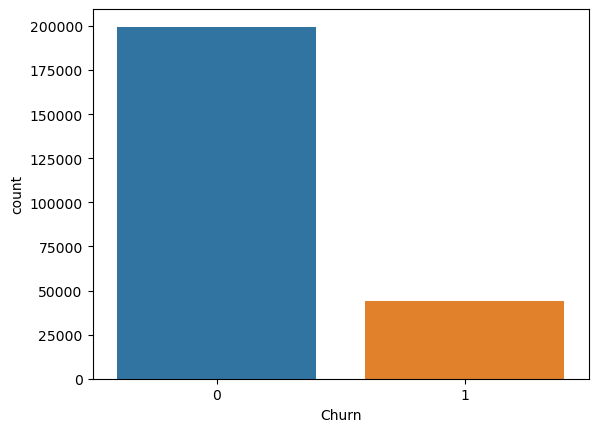

In [21]:
sns.countplot(x='Churn',data=train_data)
plt.show()

In [22]:
train_data.shape

(243787, 6)

(array([18109., 20478., 20505., 20561., 22553., 38818., 20533., 20666.,
        22888.]),
 array([  0. ,  10. ,  20. ,  30. ,  40. ,  50.6,  70. ,  80. ,  90. ,
        100. ]),
 <BarContainer object of 9 artists>)

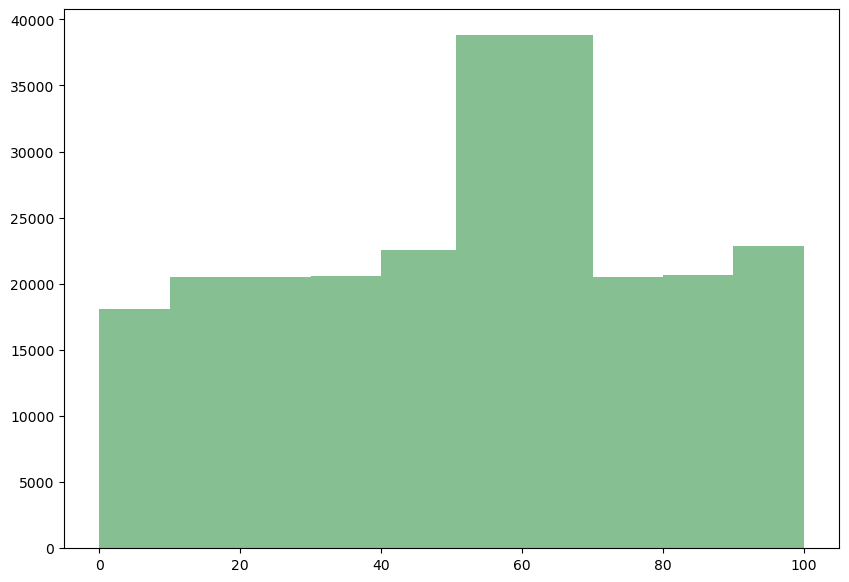

In [37]:
#hostogram shows center, spread of data and outlinears in data
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(train_data['AccountAge'],bins=[0,10,20,30,40,50.60,70,80,90,100], color='#86bf91')

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


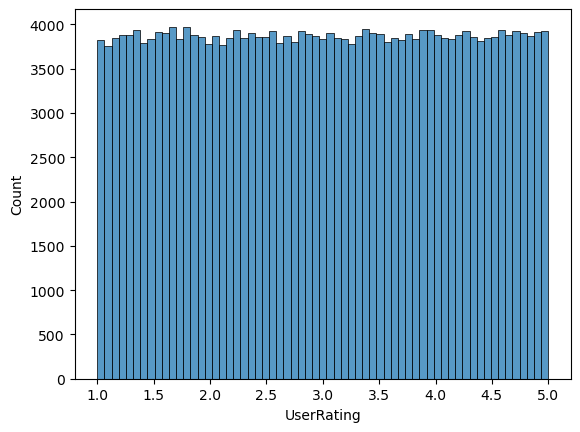

In [44]:
sns.histplot(data=train_data, x="UserRating")
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


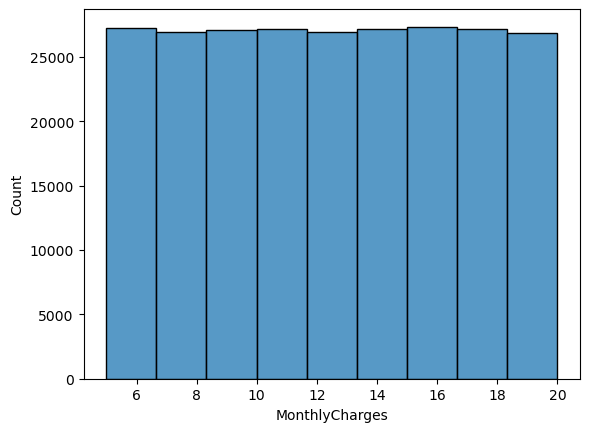

In [46]:
sns.histplot(data=train_data, x="MonthlyCharges",bins=9)
plt.show()

In [49]:
sum_samples = 1000  # Number of samples you want
sampled_data = train_data.sample(n=sum_samples, replace=False)

In [52]:
sampled_data.head(8)

,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,UserRating,Churn
97680,62,14.961099,Basic,15.754602,3.217852,0
186339,20,16.668360,Basic,1.859235,2.480774,0
44796,86,6.556348,Premium,34.012586,4.358979,0
169530,59,7.269368,Standard,20.053750,2.732027,0
105138,96,19.232373,Premium,17.676674,3.674631,0
236932,75,17.032874,Basic,10.239895,4.927505,1
55520,34,9.901677,Premium,37.565646,4.521559,0
63839,13,13.878743,Standard,7.035041,4.896961,0


D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


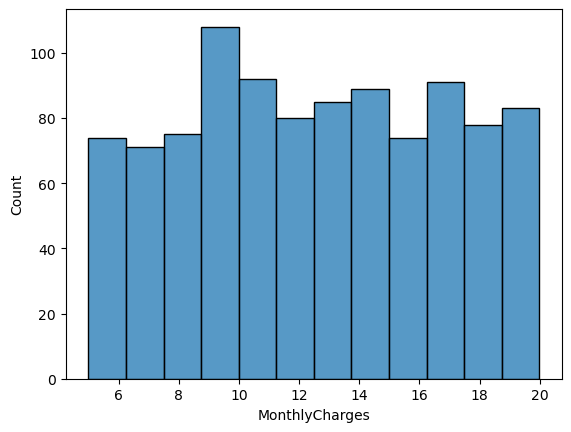

In [55]:
sns.histplot(data=sampled_data, x="MonthlyCharges",bins=12) #more than 100 people pay b/w 9 and 10
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


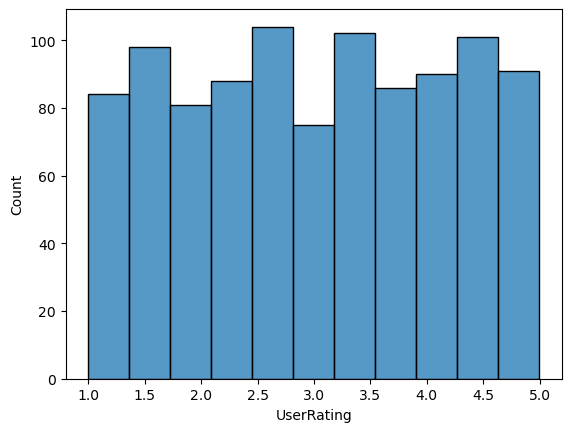

In [56]:
sns.histplot(data=sampled_data,x="UserRating")
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\si

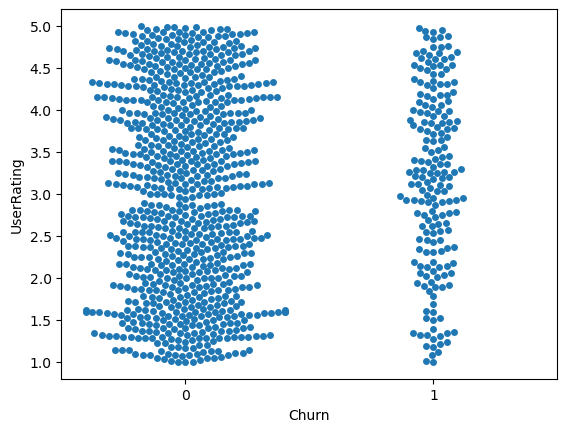

In [80]:
#x=sampled_data['Churn']
#y=sampled_data['UserRating']
sns.swarmplot(data=sampled_data,x='Churn',y='UserRating')
plt.show()

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\New folder\Lib\si

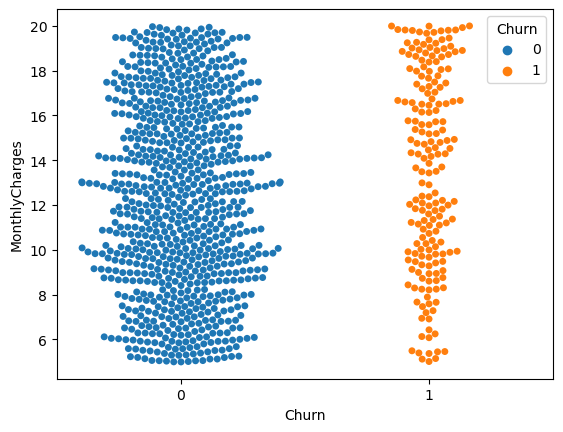

In [83]:
sns.swarmplot(data=sampled_data,x='Churn',y='MonthlyCharges',hue='Churn')
plt.show()

In [87]:
sampled_data.groupby('UserRating')['Churn'].mean()

UserRating
1.000687    0.0
1.001128    0.0
1.003425    1.0
1.004815    0.0
1.006698    1.0
           ... 
4.978696    1.0
4.984888    0.0
4.988382    0.0
4.989384    0.0
4.997509    0.0
Name: Churn, Length: 1000, dtype: float64

In [94]:
sampled_data['SubscriptionType'].replace({'Basic':0,'Standard':2,'Premium':3},inplace=True)
train_data['SubscriptionType'].replace({'Basic':0,'Standard':2,'Premium':3},inplace=True)


In [90]:
sampled_data.head(3)

,AccountAge,MonthlyCharges,SubscriptionType,ViewingHoursPerWeek,UserRating,Churn
97680,62,14.961099,0,15.754602,3.217852,0
186339,20,16.668360,0,1.859235,2.480774,0
44796,86,6.556348,3,34.012586,4.358979,0


<Axes: >

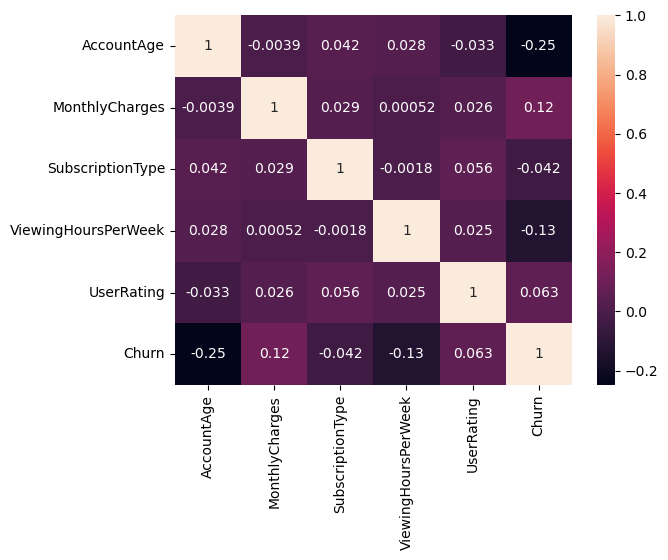

In [91]:
sns.heatmap(sampled_data.corr(),annot=True)

In [92]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [97]:
# Load Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.train_data  # Features
y = iris.test_data  # Target variable


AttributeError: train_data

In [99]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.train_data  # Features
y = iris.test_target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


AttributeError: train_data